# Styles and formatting

Any `Element` object in <b><font color="blue" style="font-family:'Courier New'">fivecentplots </font></b> (legend, axis, label, etc.) has certain properties like edge color, fill color, font size that can be styled.  Each of the properties can be set by passing the appropriate keyword to the function call to make the plot <b>or</b> by setting a new default value in a custom theme file.  Examples of style changes are described below.

## Setup

### Imports

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import fivecentplots as fcp
import pandas as pd
import numpy as np
import os, sys, pdb
osjoin = os.path.join
st = pdb.set_trace

### Sample data

In [2]:
df = pd.read_csv(osjoin(os.path.dirname(fcp.__file__), 'tests', 'fake_data.csv'))
df.head()

,Substrate,Target Wavelength,Boost Level,Temperature [C],Die,Voltage,I Set,I [A]
0,Si,450,0.2,25,"(1,1)",0.0,0.0,0.0
1,Si,450,0.2,25,"(1,1)",0.1,0.0,0.0
2,Si,450,0.2,25,"(1,1)",0.2,0.0,0.0
3,Si,450,0.2,25,"(1,1)",0.3,0.0,0.0
4,Si,450,0.2,25,"(1,1)",0.4,0.0,0.0


### Set theme

Optionally set the design theme

In [3]:
#fcp.set_theme('gray')
#fcp.set_theme('white')

### Other

In [4]:
SHOW = False

## Colors

### Fill colors

Many elements in a plot are capable of having a fill color (axes, figure background, markers, etc.).  These fill colors are accessible using the standard keyword nomenclature of the element name followed by an underscore and the keyword `fill_color`.  <i>All colors are specified using 6-character hex codes.</i>

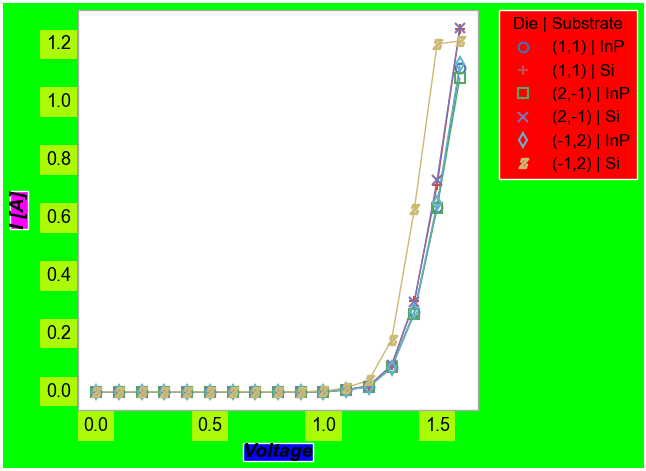

In [5]:
fcp.plot(df=df, x='Voltage', y='I [A]', legend=['Die', 'Substrate'], \
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         fig_fill_color='#00FF00', legend_fill_color='#FF0000', ax_fill_color='#FFFFFF',
         label_x_fill_color='#0000FF', label_y_fill_color='#FF00FF', 
         tick_labels_major_fill_color='#AAFB05')

### Edge colors

#### Typical elements

Many elements in a plot also support an edge color (i.e., the border around an object).  These edge colors are accessible using the standard keyword nomenclature of the element name followed by `_edge_color`. Additionally, the width of the edge or border can be specified via keyword using the name of the element followed by `_edge_width`.

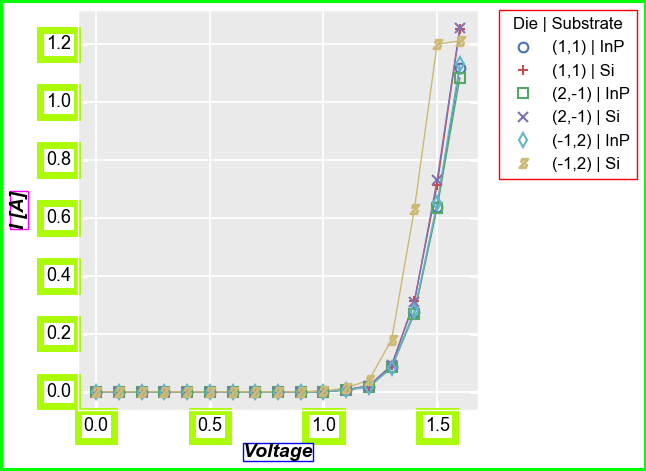

In [6]:
fcp.plot(df=df, x='Voltage', y='I [A]', legend=['Die', 'Substrate'], \
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         fig_edge_color='#00FF00', legend_edge_color='#FF0000', ax_edge_color='#FFFFFF',
         label_x_edge_color='#0000FF', label_y_edge_color='#FF00FF',
         tick_labels_major_edge_color='#AAFB05', tick_labels_major_edge_width=5)

#### Spines

One special case of `edge_color` is the "spines" or borders around an axis area.  In addition to setting the color through the `ax_edge_color` keyword, individual edges can be turned on or off individually using the keyword `spine_<bottom|top|left|right>` or `spines` to simultaneously toggle all of them at once.

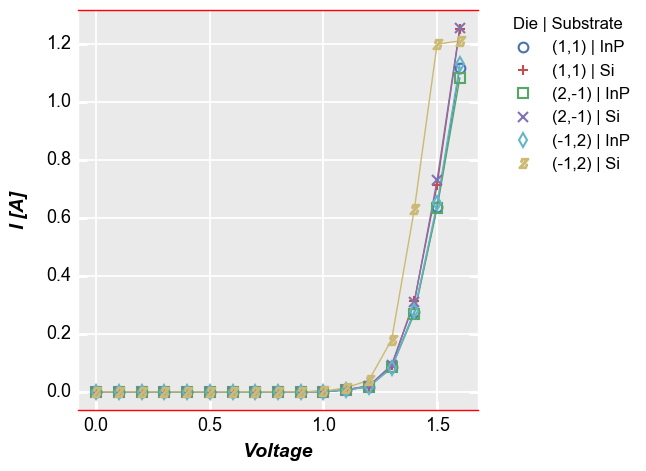

In [7]:
fcp.plot(df=df, x='Voltage', y='I [A]', legend=['Die', 'Substrate'], \
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         ax_edge_color='#FF0000', spine_left=False, spine_right=False)

### Alpha

Elements also support alpha for transparency.  By default alpha=1 for all elements, but can be changed using the standard keyword nomenclature of the element name followed by an underscore and the keyword `fill_alpha` or `edge_alpha`.

In addition to the fill and edge colors, we can also specify the alpha or opacity of the color.  This is done by replacing `_fill_color` or `_edge_color` in a given keyword with `_fill_alpha` or `_edge_alpha`, respectively.  The alpha value is a float ranging from 0 (full opacity) to 1 (no opacity).  Internally, the alpha level is converted into hex and appended to the fill or edge color value to make an 8-character hex color code.  

Consider the fill example above, with alpha applied to the fill colors:

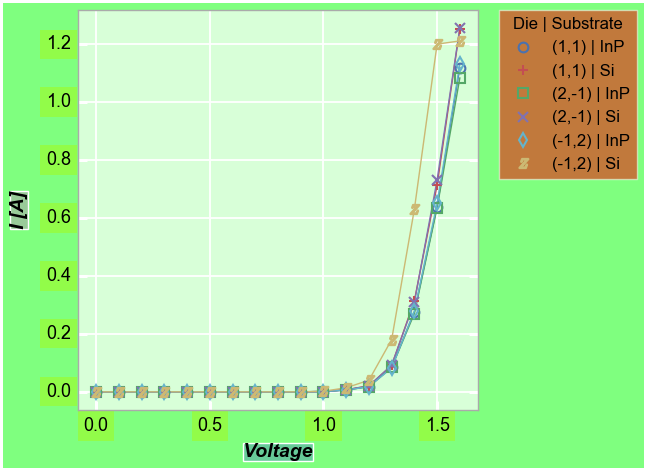

In [8]:
fcp.plot(df=df, x='Voltage', y='I [A]', legend=['Die', 'Substrate'], \
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         fig_fill_color='#00FF00', fig_fill_alpha=0.5,
         legend_fill_color='#FF0000', legend_fill_alpha=0.52,
         ax_fill_color='#FFFFFF', ax_fill_alpha=0.7,
         label_x_fill_color='#0000FF', label_x_fill_alpha=0.2,
         label_y_fill_color='#FF00FF', label_y_fill_alpha=0.2,
         tick_labels_major_fill_color='#AAFB05', tick_labels_major_fill_alpha=0.45)

When adding alpha to plot markers, the legend markers will retain full opacity by default:

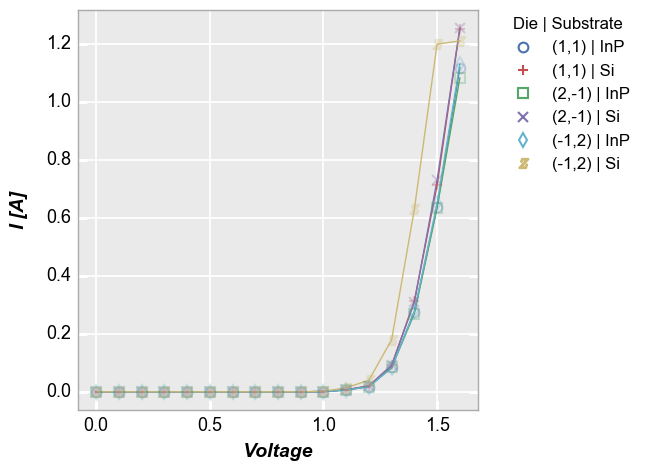

In [9]:
fcp.plot(df=df, x='Voltage', y='I [A]', legend=['Die', 'Substrate'], \
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         marker_edge_alpha=0.3)

However, there are instances when we want alpha on the plot markers <i>and</i> on the legend markers.  To achieve this, use the keyword `legend_marker_alpha` to set both the edge and fill alpha of the legend markers to a different value:

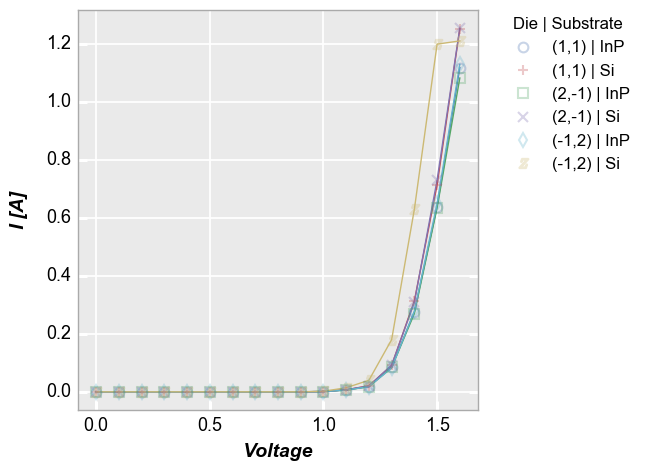

In [10]:
fcp.plot(df=df, x='Voltage', y='I [A]', legend=['Die', 'Substrate'], \
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         marker_edge_alpha=0.3, legend_marker_alpha=0.3)

### Line colors

#### Built-in color list

All connecting lines drawn through markers in a plot can be colored.  <b><font color="blue" style="font-family:'Courier New'">fivecentplots </font></b> comes with a built-in list of line (and marker) colors (an expanded set of colors from the terrific default palette in the seaborn plotting library).  This color pattern repeats indefinetly in case the number of plotted lines exceeds the length of the built-in list.

.. image:: _static/images/colors.png

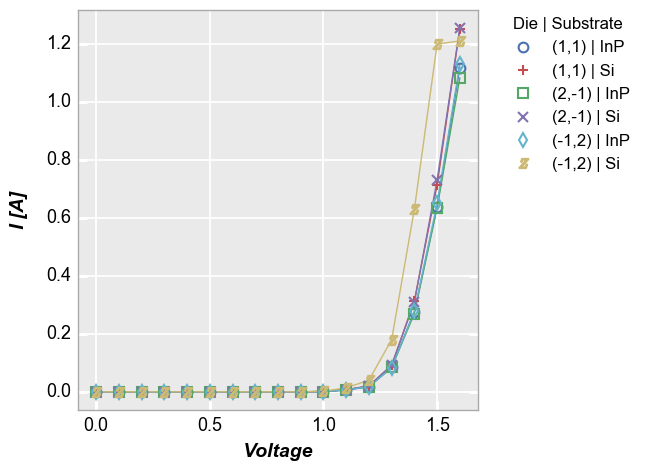

In [11]:
fcp.plot(df=df, x='Voltage', y='I [A]', legend=['Die', 'Substrate'], \
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25')

#### Custom color list

The built-in list of colors can be overriden by passing a list of hex-based color codes to the `colors` keyword.  Like the built-in list, the custom list will also cycle back to the start if there are more lines than colors.

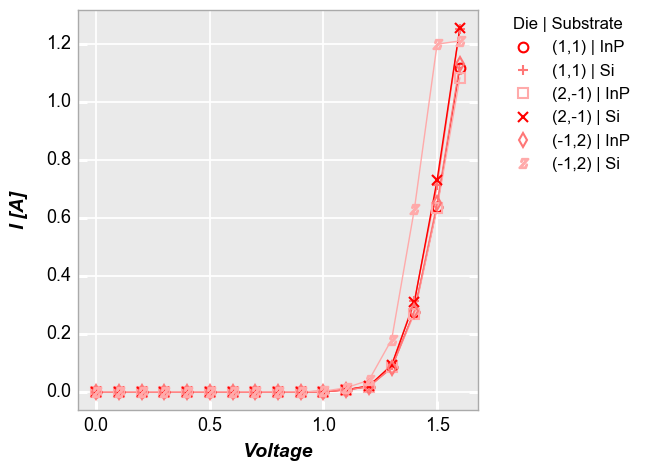

In [12]:
fcp.plot(df=df, x='Voltage', y='I [A]', legend=['Die', 'Substrate'], \
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         colors=['#FF0000', '#FF7777', '#FFAAAA'])

We can also select certain colors from the default color list by index rather than specifying the full hex color code:

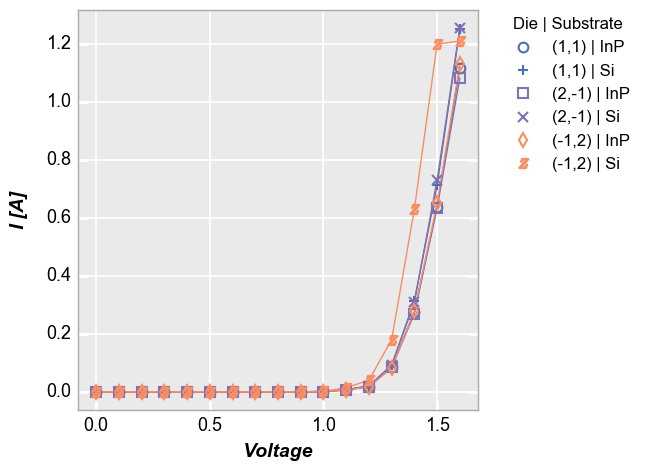

In [13]:
fcp.plot(df=df, x='Voltage', y='I [A]', legend=['Die', 'Substrate'], \
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         colors=[0, 0, 3, 3, 6, 6])

#### Colormap

The color list can also be replaced by a discretized colormap using the keyword `cmap`

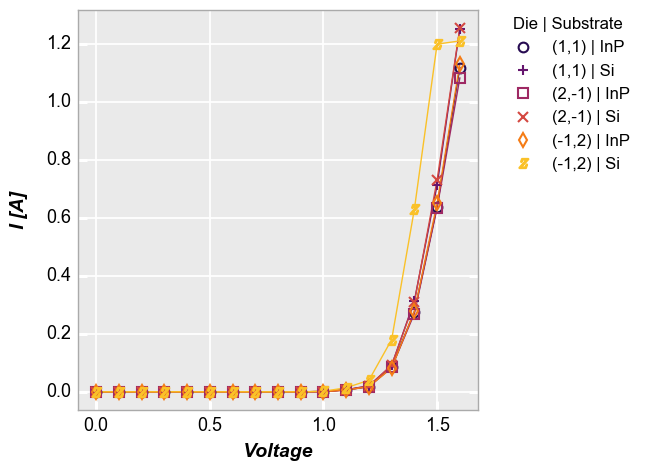

In [14]:
fcp.plot(df=df, x='Voltage', y='I [A]', legend=['Die', 'Substrate'], \
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         cmap='inferno')

#### Line styling

Plot lines do not have a fill or edge so the typical styling parameters like `<element name>_fill_color` do not exist.  Instead, lines have just a unary styling keywords: `lines_color`, `lines_width`, `lines_style` and `lines_alpha`.  In this case, we apply global style settings to all lines in the data set.

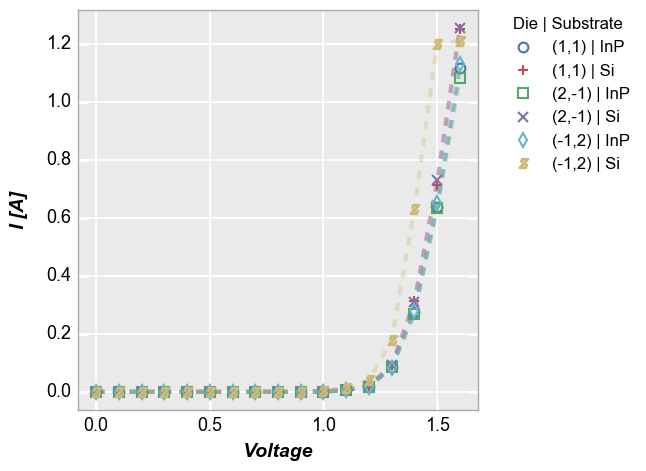

In [15]:
fcp.plot(df=df, x='Voltage', y='I [A]', legend=['Die', 'Substrate'], \
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         lines_alpha=0.33, lines_style='--', lines_width=3)

The nomenclature above of `lines_<some property>` stems from the fact that plot line properties are contained in the `lines` Element class.  However, because this naming scheme may be cumbersome to some users, the non-plural version of these keywords is also supported:
* `lines_color` --> `line_color`
* `lines_width` --> `line_width`
* `lines_style` --> `line_style`
* `lines_alpha` --> `line_alpha`

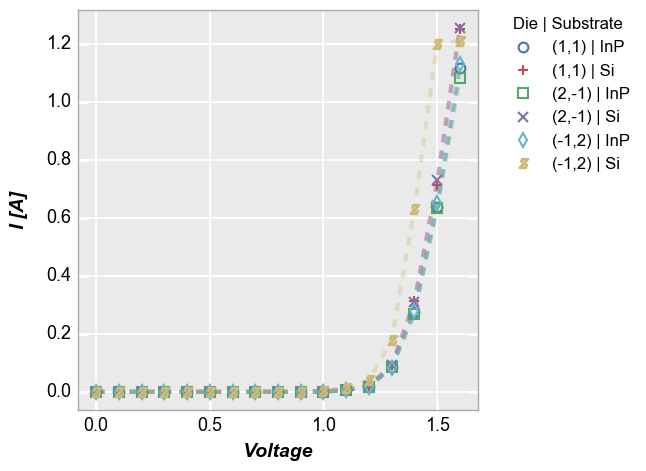

In [16]:
fcp.plot(df=df, x='Voltage', y='I [A]', legend=['Die', 'Substrate'], \
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         line_alpha=0.33, line_style='--', line_width=3)

We can also set line styles for each line, instead of applying them globally:

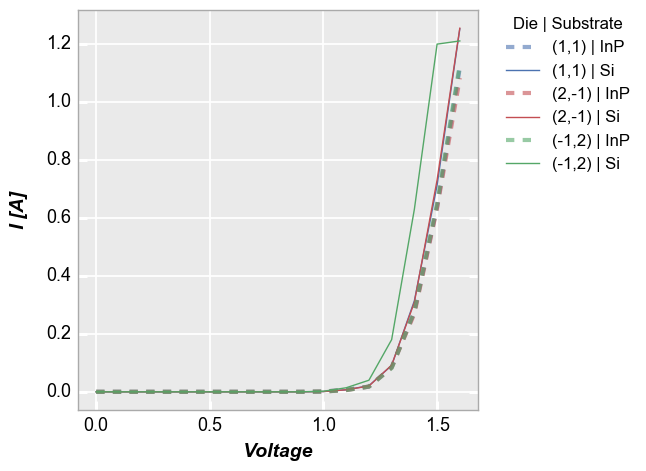

In [17]:
fcp.plot(df=df, x='Voltage', y='I [A]', legend=['Die', 'Substrate'], markers=False, \
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         colors=[0, 0, 1, 1, 2, 2], 
         lines_width=[3, 1, 3, 1, 3, 1], lines_style=['--', '-'], lines_alpha=[0.6, 1])

### Marker colors

Markers can have both an edge and a fill color, with and without alpha.  By default the edge color is matched to the line color, fill color is disable, and no opacity.  However, we can override any of these as shown below.

<b>Change the marker edge color for all markers:</b>

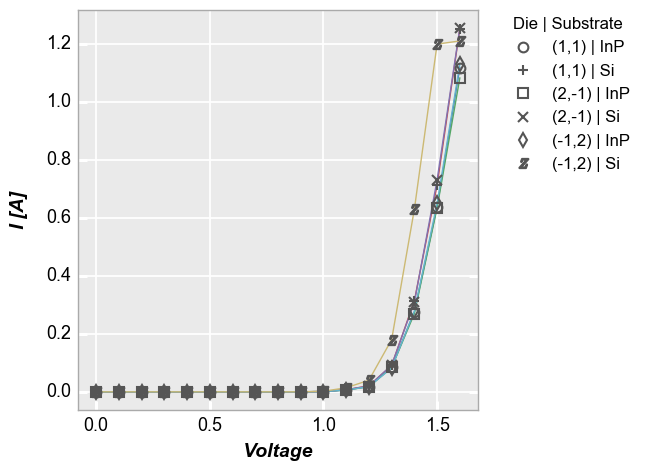

In [18]:
fcp.plot(df=df, x='Voltage', y='I [A]', legend=['Die', 'Substrate'], \
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         marker_edge_color=['#555555'])

<b>All a custom fill color:</b>

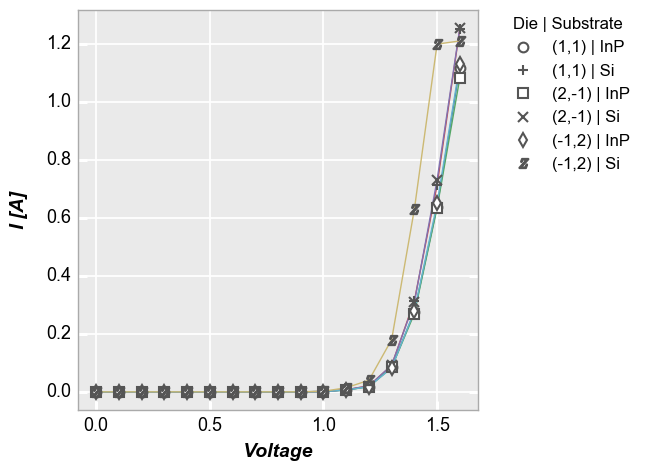

In [19]:
fcp.plot(df=df, x='Voltage', y='I [A]', legend=['Die', 'Substrate'], \
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         marker_edge_color=['#555555'], marker_fill_color='#FFFFFF')

<b>Use the default color scheme with marker fill:</b>

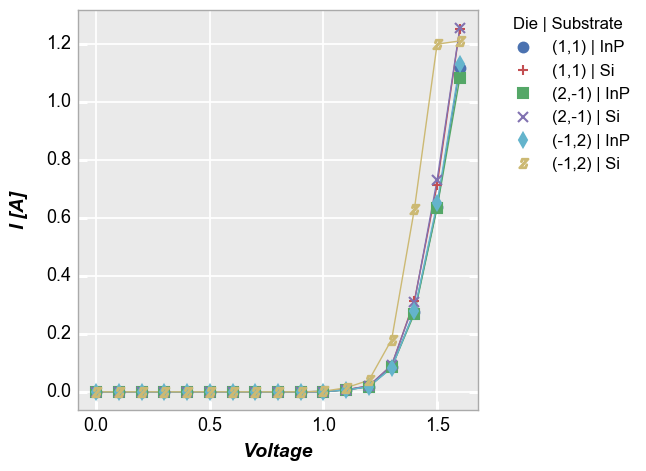

In [20]:
fcp.plot(df=df, x='Voltage', y='I [A]', legend=['Die', 'Substrate'], \
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         marker_fill=True)

<b>Add fill alpha:</b>

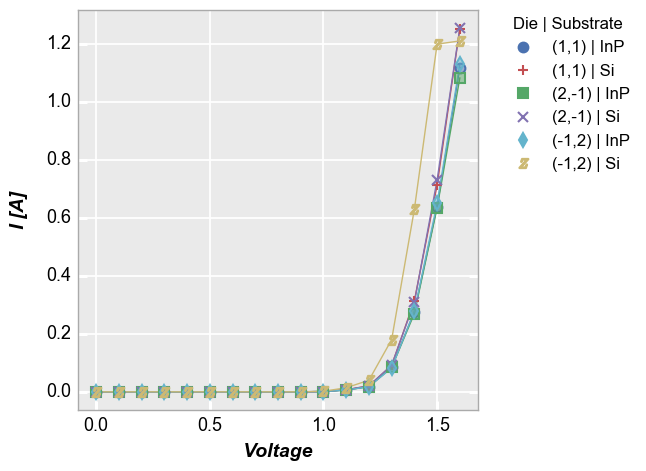

In [21]:
fcp.plot(df=df, x='Voltage', y='I [A]', legend=['Die', 'Substrate'], \
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         marker_fill=True, marker_fill_alpha=0.5)

### Boxplot example

Boxplots have color options for the boxes or violins that are drawn behind the markers:

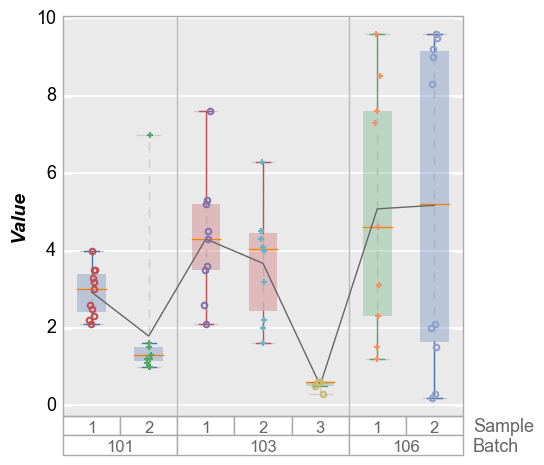

In [22]:
df_box = pd.read_csv(osjoin(os.path.dirname(fcp.__file__), 'tests', 'fake_data_box.csv'))
fcp.boxplot(df=df_box, y='Value', groups=['Batch', 'Sample'], show=SHOW, 
            box_fill_color=[0, 0, 1, 1, 2, 2], box_fill_alpha=0.3, box_edge_width=0,
            marker_edge_color=[0, 0, 1, 1, 2, 2], marker_type=['o', '+'], 
            box_whisker_color=[0, 0, 1, 1, 2, 2], box_whisker_width=1)

### Histogram example

By default, histograms have a fill alpha value of 0.5 (unless overriden by the theme file or keyword).  This can easily be tailored for a different style.  Compare the default plot:

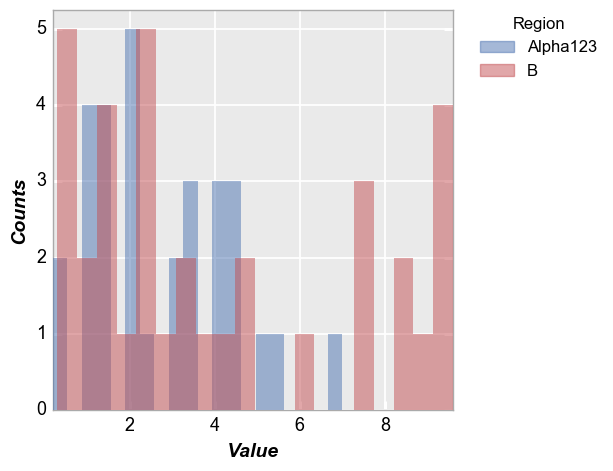

In [23]:
df_hist = pd.read_csv(osjoin(os.path.dirname(fcp.__file__), 'tests', 'fake_data_box.csv'))
fcp.hist(df=df_hist, x='Value', show=SHOW, legend='Region')

with this one, that employs the `hist_fill_alpha` keyword:

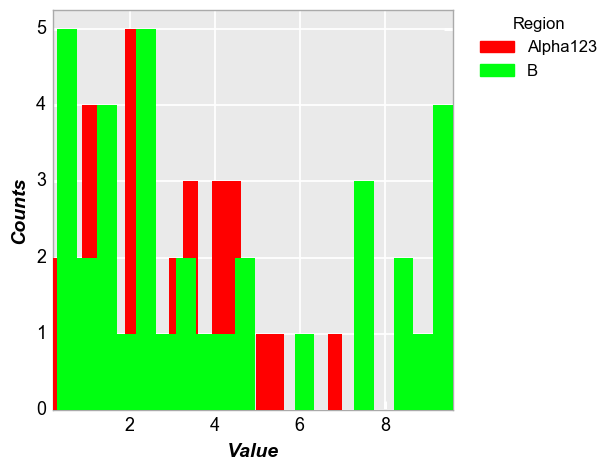

In [24]:
fcp.hist(df=df_hist, x='Value', show=SHOW, legend='Region', hist_fill_alpha=1, colors=['#FF0000', '#00FF11'])

The benefit of transparency is clear in order to visualize both distributions simultaneously.

## Markers

### Marker type

<b><font color="blue" style="font-family:'Courier New'">fivecentplots </font></b> comes with a built-in list of marker styles:

.. image:: _static/images/markers.png

You can specify your own markers by passing a list of marker string names to the `markers` keyword.  As with colors, the marker list will loop back on itself if the number of curves exceeds the number of items in the list.

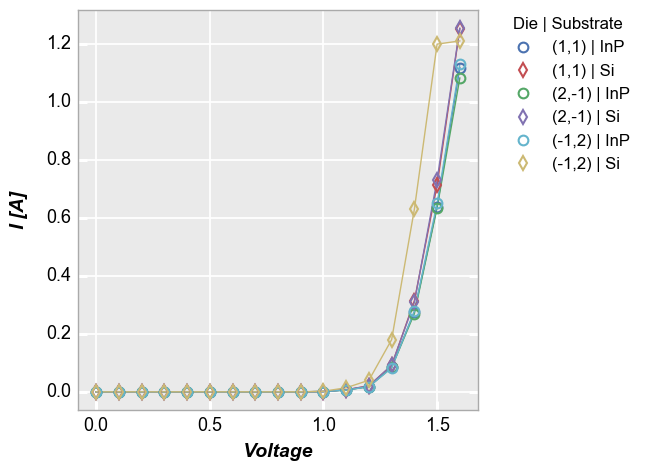

In [25]:
fcp.plot(df=df, x='Voltage', y='I [A]', legend=['Die', 'Substrate'], \
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         markers=['o', 'd'])

### Marker size

The size of the markers within the plot window are controlled by the `marker_size` keyword.  All data sets share the same marker size.  Notice that the legend markers do not scale their size with the markers on the plot.

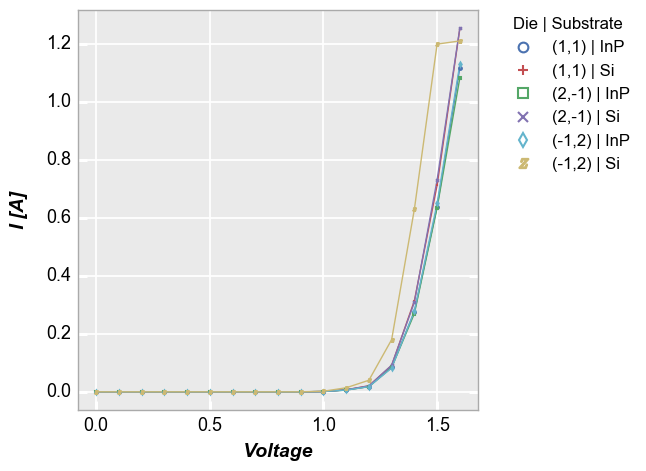

In [26]:
fcp.plot(df=df, x='Voltage', y='I [A]', legend=['Die', 'Substrate'], \
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         marker_size=2)

The legend marker size can be controlled independently if needed using the keyword `legend_marker_size`:

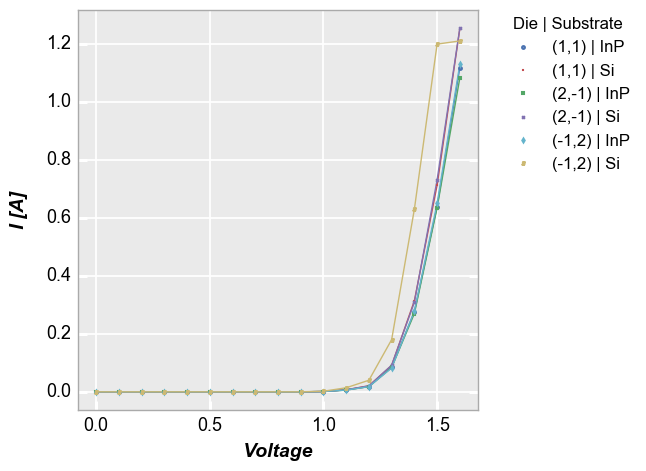

In [27]:
fcp.plot(df=df, x='Voltage', y='I [A]', legend=['Die', 'Substrate'], \
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         marker_size=2, legend_marker_size=2)

## Fonts

All text elements (plot title, labels, etc.) can be styled via the font attributes associated with the object (see <a href=https://endangeredoxen.github.io/fivecentplots/keyword.html#default-attributes>Default Attributes</a>).  Please note that the font family "fantasy" below looks an awful lot like comic sans which really should be banned globally.

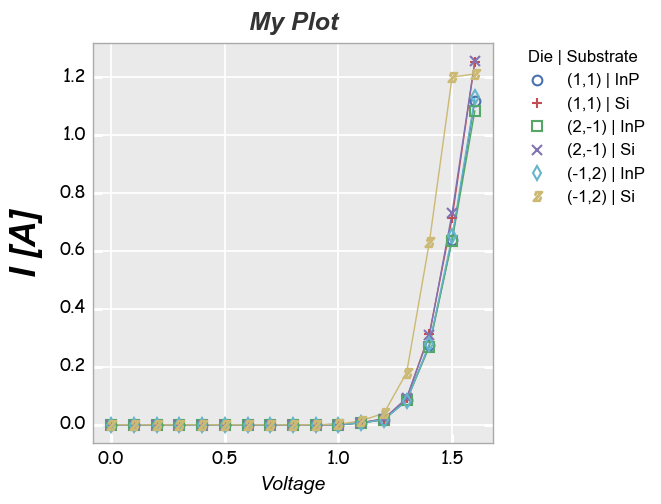

In [28]:
fcp.plot(df=df, x='Voltage', y='I [A]', legend=['Die', 'Substrate'], \
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         title='My Plot', title_font_style='italic', 
         label_y_font_size=25, label_y_style='normal',
         label_x_font_weight='normal',
         tick_labels_major_font='fantasy')

## Themes

Theme files are used to apply user style preferences to all plots <i>without explicitly stating them in keyword arguments</i>.  These `.py` files are populated with dictionaries and lists of style settings.  A theme file can be applied globally using the command `fcp.set_theme()`.  Once a theme file is selected, a local copy is made in a <Users>/.fivecentplots directory.  <b><font color="blue" style="font-family:'Courier New'">fivecentplots </font></b> provides both a "gray" and and "white" theme to get started.  You can modify this local file as you wish to get the exact, consistent look you desire.
    
    
<br>The theme file consists of three main parts:

<br>
1) `fcp_params`:  this is a python dictionary that contains any `fcp` keyword argument for which you want to override the default:

    fcp_params = {'ax_edge_color': '#aaaaaa',
                  'ax_fill_color': '#eaeaea',
                  'ax_size': [400,400],  # [width, height]
                 }
             
<br>2) `colors`: a list of default colors

    colors = ['#000000', '#111111', '#222222']

<br>3) `markers`: a list of default markers

    markers = ['+', 'o', 'd', '$']

<br>The order of preference for assigning element attributes when plot elements are created is:

<br>1) keywords in the function call

<br>2) keywords defined in the local theme file

<br>3) built-in default values

<br>4) when using the matplotlib engine, any rcParam overrides you want to apply

Themes are stored in a local user directory (in Windows, this means `C:\Users\you\.fivecentplots`).  The current theme is copied to a new file called `defaults.py`.  All defaults are pulled from this file.  

You can switch between themes using the prompt displayed after executing the `fcp.set_theme()` command.  This will open a list of all built-in themes and any custom themes found in your user directory (these files must have a different name than `defaults.py`).  The old theme file will be backed up to `defaults_old.py` while the new theme file will be copied to `defaults.py`.  You can also pass the name of a theme file directly to `set_theme` to skip the dialog.  However, if you have a custom theme file in your user directory with the same name as one of the master theme files, `set_theme` will always give preference to the built-in themes, <i>not</i> your custom theme.

<b> Note: If you create a good theme that you think others can benefit from, feel free to submit it via the github page for this project.</b>

### White default theme

In [29]:
fcp.set_theme('white')

Previous theme file found! Renaming to "defaults_old.py" and copying new theme...done!


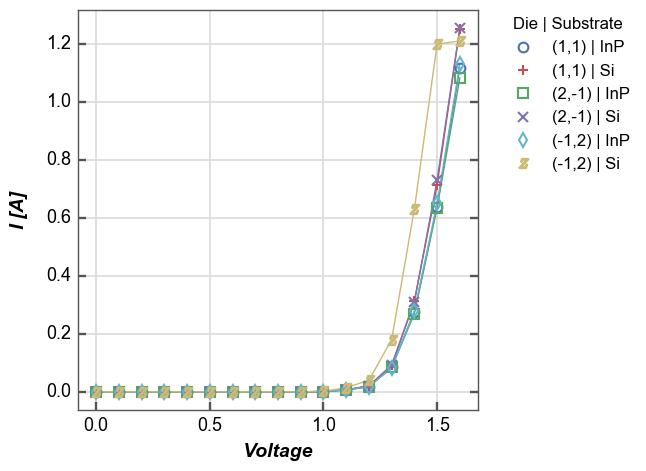

In [30]:
fcp.plot(df=df, x='Voltage', y='I [A]', legend=['Die', 'Substrate'], \
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25')

### Gray default theme

In [31]:
fcp.set_theme('gray')

Previous theme file found! Renaming to "defaults_old.py" and copying new theme...done!


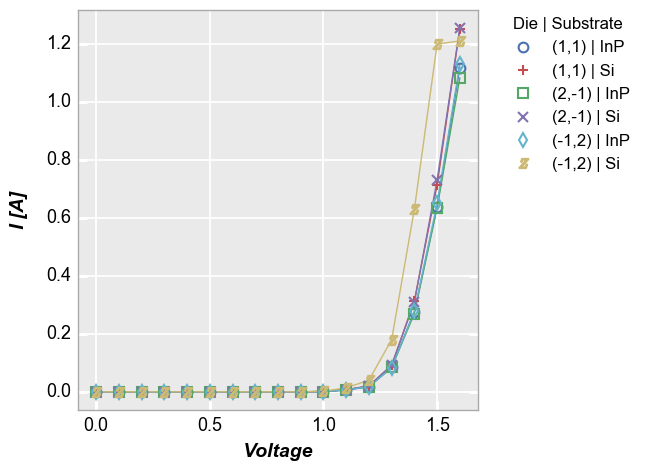

In [32]:
fcp.plot(df=df, x='Voltage', y='I [A]', legend=['Die', 'Substrate'], \
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25')